### Introduction
This workbook applies different ensemble trees-based models to predict the critical temperature of superconductors. Predicting the critical temperature of superconductors can help further our understanding of superconductivity and aid in designing and discovering new materials. It is also useful for the advancement of quantumn computing technology, which heavily relies on superconductors

In [27]:
# import statements
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor



In [30]:
#load df
df = pd.read_csv('superconductor.csv')
display(df)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [32]:
#Preprocessing
X = df.drop('critical_temp', axis=1) # TODO: Take features
y = df['critical_temp'] # TODO: Take variable

X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.25,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.20,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.50,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.50,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [33]:
#Train test split
test_size = 0.3 # Define the percentage of the test size after train-test split
random_state = 42 #Define random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state) # TODO: Use train_test_split method
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (14884, 81), y_train shape: (14884,)
X_test shape: (6379, 81), y_test shape: (6379,)


In [34]:
#Function to find the optimal hyperparamter using gridsearch
def optimal_hyperparam(model, param_grid, X_train, Y_train):
    param = list(param_grid.keys())[0]    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, Y_train)
    best_max_depth = grid_search.best_params_[f'{param}']

    # Train the model with the optimal max_depth
    model.set_params(**{f'{param}': best_max_depth, 'random_state': 42})
    model.fit(X_train, Y_train)
    
    return model


## Regression Tree

In [35]:
#Define and Fit Regression tree model
param_grid = {'max_depth': range(1, 21)}
regression_tree = optimal_hyperparam(DecisionTreeRegressor(), param_grid, X_train, y_train)
regression_tree.max_depth

19

In [36]:
# Make predictions
y_pred_cart = regression_tree.predict(X_test)

In [37]:
#Evaluate model
cart_correlation = np.corrcoef(y_pred_cart, y_test)[0, 1]
cart_rmse = np.sqrt(mean_squared_error(y_test, y_pred_cart))
cart_bias = np.mean(y_pred_cart - y_test)

print(f'Correlation: {cart_correlation:.2f}')
print(f'RMSE: {cart_rmse:.2f}')
print(f'Bias: {cart_bias:.2f}')

Correlation: 0.94
RMSE: 12.09
Bias: 0.30


The regression tree already performs quite well at predicting the critical temperature. Slightly positive bias with a high correlation and a RMSe of 12.09. We can use this as a baseline model to compare the other models to.

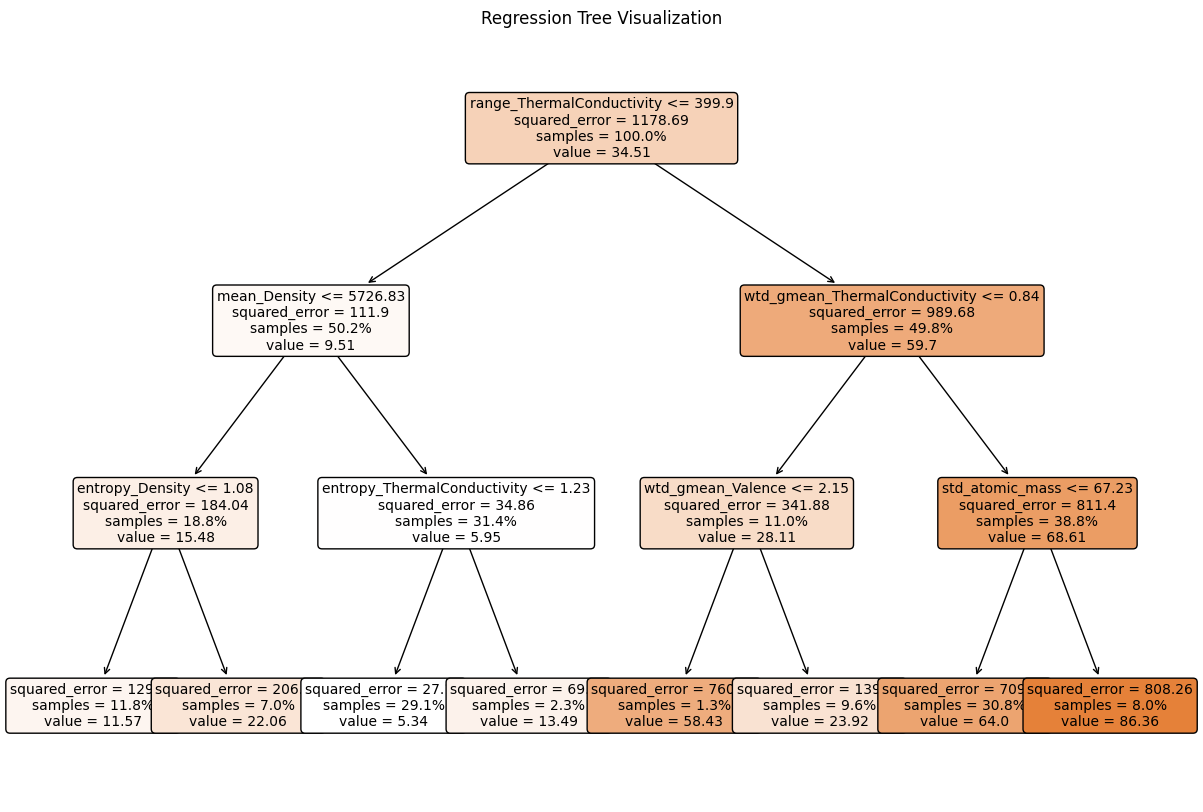

In [39]:
# Visualize the regression tree using plot_tree
#Use a model with less depth for visualization purposes
simple_regression_tree = DecisionTreeRegressor(max_depth=3) # you can experiment with any hyperparameters
simple_regression_tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(simple_regression_tree, feature_names=list(X.columns), filled=True, rounded=True, proportion=True, precision=2, fontsize= 10)
plt.title("Regression Tree Visualization")
plt.show()

From this simplified decision tree, we see the feature that minimzes the mean squared error the most is range_ThermalConductivity. It splits the datasets into subsets less than or equal to 399 and above. The next best splitting features are the mean_Density and wtd_gmean_ThermalConductivity.

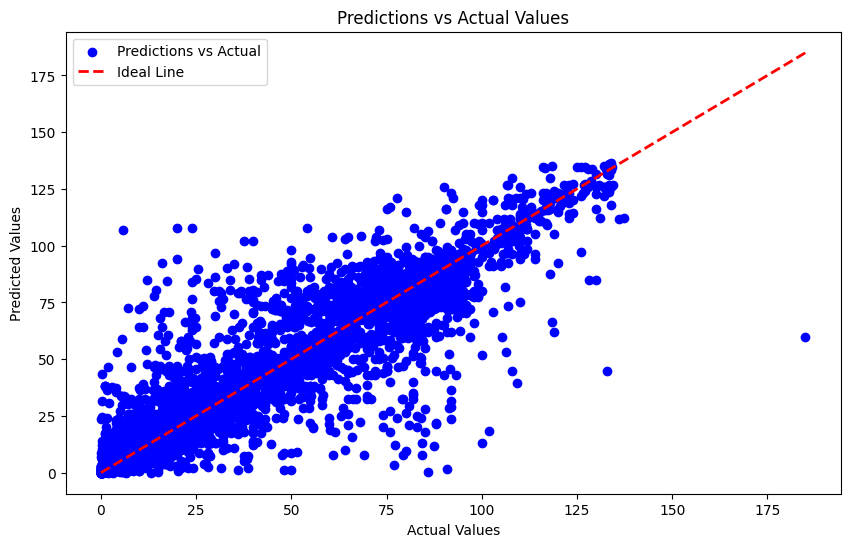

In [40]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_cart, color='blue', label='Predictions vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Random Forest

In [41]:
#Define and Fit Random Forest Model
param_grid = {'n_estimators': [50, 100, 150, 200]}
rf_model = optimal_hyperparam(RandomForestRegressor(max_features='sqrt'), param_grid, X_train, y_train)
rf_model.n_estimators

100

In [43]:
#Make predictions
y_pred_rf = rf_model.predict(X_test)

In [44]:
#Evaluate model
rf_correlation = np.corrcoef(y_pred_rf, y_test)[0, 1]
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_bias = np.mean(y_pred_rf - y_test)

print(f'Correlation: {rf_correlation:.2f}')
print(f'RMSE: {rf_rmse:.2f}')
print(f'Bias: {rf_bias:.2f}')

Correlation: 0.96
RMSE: 9.54
Bias: 0.36


Compared to the Regression Tree, the Random forest performs better on all metrics at the cost of a slightly higher bias score. The better performance is expected as the Random forest model aggregates the score of many regression trees (in this case 100) to reduce variance

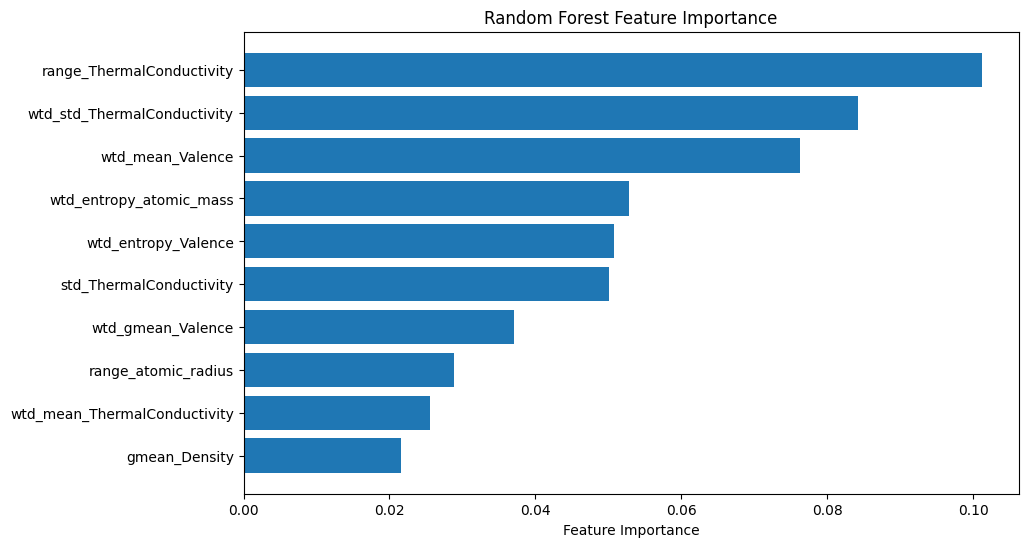

In [45]:
# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Get the names of features
feature_names = list(X.columns)

# Sort top 10 features based on importance
sorted_idx = feature_importances.argsort()[-10:]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

As in the regression tree, the most important feature is range_ThermalConductivity. It contributes about 10% to the predictive power of our Random Forest model. It is the most relevant feature in our model.

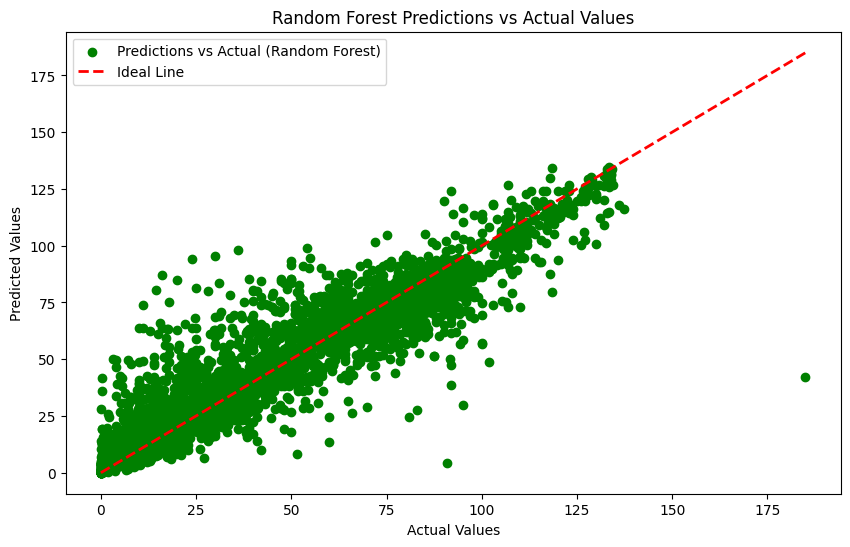

In [46]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predictions vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

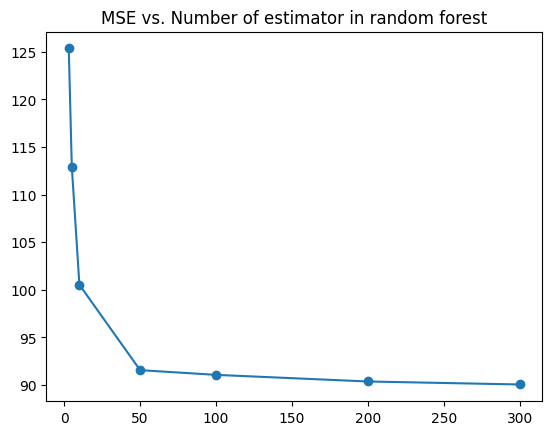

In [47]:
nList = [3,5,10,50,100,200,300]
mseList = []
for nEst in nList:
    # Define an Random Forest object using RandomForestRegressor 
    rf_model = RandomForestRegressor(n_estimators=nEst, max_features='sqrt', random_state=42)
    
    # Fit the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_nrf = rf_model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_nrf)
    mseList.append(mse)

plt.plot(nList,mseList,"-o")
plt.title('MSE vs. Number of estimator in random forest')
plt.show()

As the number of estimators goes up, the mean squared error of the model decreases. It starts to bottom out around 100 estimators; adding more estimators after that point does not significantly reduce the mean squared error of the model

## Bagging

In [48]:
#Define and fit Bagging Regressor
param_grid = {'n_estimators': [50, 100, 150, 200]}
bagging_model = optimal_hyperparam(BaggingRegressor(estimator=LinearRegression()), param_grid, X_train, y_train)
bagging_model.n_estimators

200

In [49]:
#Make predictions
y_pred_bagging = bagging_model.predict(X_test)

In [50]:
#Evaluate Model
bagging_correlation = np.corrcoef(y_pred_bagging, y_test)[0, 1]
bagging_rmse = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
bagging_bias = np.mean(y_pred_bagging - y_test)

print(f'Correlation: {bagging_correlation:.2f}')
print(f'RMSE: {bagging_rmse:.2f}')
print(f'Bias: {bagging_bias:.2f}')

Correlation: 0.85
RMSE: 17.76
Bias: 0.10


Although less biased, the bagging regressor model based on linear regression performs worse in terms of correlation and RMSE compared to the regression tree and Random Forest. This suggests that linear regreesion performs worse at predicting the critical temperature of superconductors than regression trees

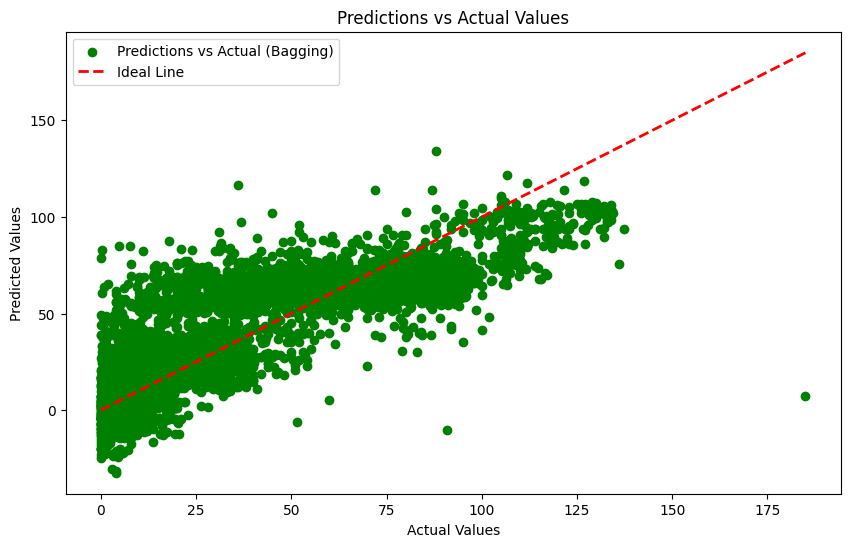

In [51]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_bagging, color='green', label='Predictions vs Actual (Bagging)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## Boosting

### AdaBoost

In [52]:
param_grid = {'n_estimators': [50, 100, 150, 200]}
adaboost_model = optimal_hyperparam(AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5)), param_grid, X_train, y_train)

In [53]:
y_pred_adaboost = adaboost_model.predict(X_test)

In [54]:
adaboost_correlation = np.corrcoef(y_pred_adaboost, y_test)[0, 1]
adaboost_rmse = np.sqrt(mean_squared_error(y_test, y_pred_adaboost))
adaboost_bias = np.mean(y_pred_adaboost - y_test)

print(f'Correlation: {adaboost_correlation:.2f}')
print(f'RMSE: {adaboost_rmse:.2f}')
print(f'Bias: {adaboost_bias:.2f}')

Correlation: 0.91
RMSE: 15.21
Bias: 0.03


The AdaBoost model has almost no bias but performs worse than our regeression tree model on correlation and RMSE. This is explained by the fact that it is a boosting model trained on weak learners, therefore it optimizes bias. The lower scores on the other metrics can be explained by the max depth of the decision tree regressor (5) being less than the regression tree model (19). I had to limit it to this number for computational performance.

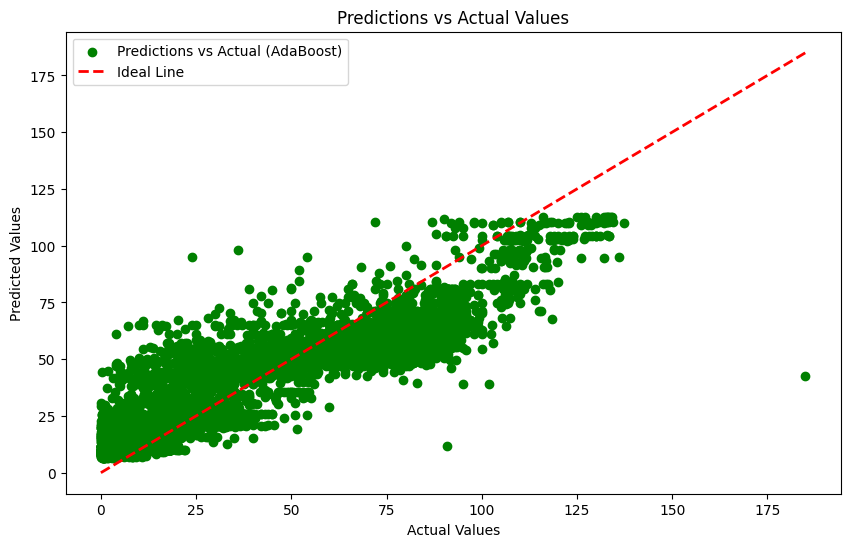

In [55]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_adaboost, color='green', label='Predictions vs Actual (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [56]:
param_grid = {'n_estimators': [50, 100, 150, 200]}
xgb_model = optimal_hyperparam(XGBRegressor(max_depth=5), param_grid, X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
xgb_correlation = np.corrcoef(y_pred_xgb, y_test)[0, 1]
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_bias = np.mean(y_pred_xgb - y_test)

print(f'Correlation: {xgb_correlation:.2f}')
print(f'RMSE: {xgb_rmse:.2f}')
print(f'Bias: {xgb_bias:.2f}')

Correlation: 0.96
RMSE: 9.85
Bias: 0.32


The XGboost model performs a lot better than the regression tree model on correlation and RMSE and slightly worse on bias. The regularization techniques help optimize feature selection, leading to better metrics

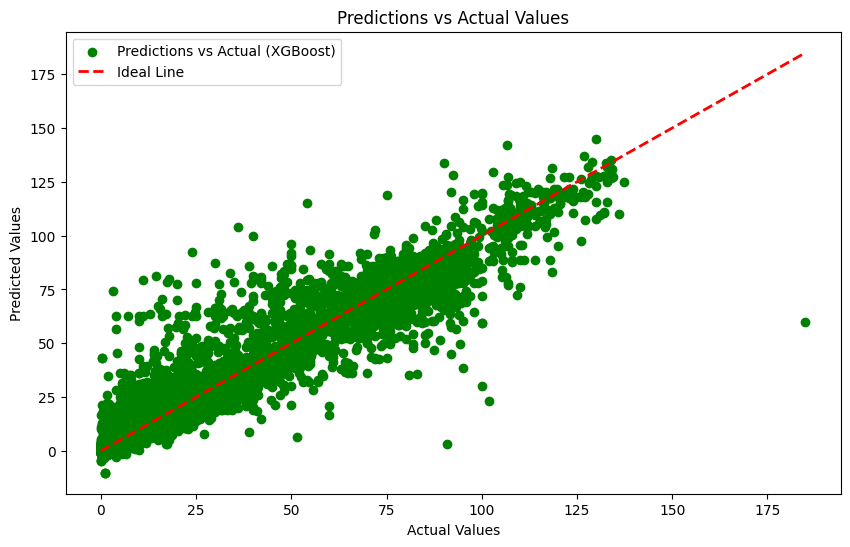

In [57]:
# Plotting predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='Predictions vs Actual (XGBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Ideal Line')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [58]:
import plotly.graph_objects as go
# Define model names
model_names = ['CART', 'Random Forest', 'Bagging', 'AdaBoost', 'XGBoost']

# Define evaluation metrics for each model
rmse_scores = [cart_rmse, rf_rmse, bagging_rmse, adaboost_rmse, xgb_rmse]
correlation_scores = [cart_correlation, rf_correlation, bagging_correlation, adaboost_correlation, xgb_correlation]
bias_scores = [cart_bias, rf_bias, bagging_bias, adaboost_bias, xgb_bias]

# Create traces for each evaluation metric
trace_rmse = go.Bar(x=model_names, y=rmse_scores, name='RMSE', marker_color='skyblue')
trace_correlation = go.Bar(x=model_names, y=correlation_scores, name='Correlation', marker_color='lightgreen')
trace_bias = go.Bar(x=model_names, y=bias_scores, name='Bias', marker_color='salmon')

# Create subplot figure
fig = go.Figure(data=[trace_rmse, trace_correlation, trace_bias])

# Update layout
fig.update_layout(barmode='group', title='Model Comparison',
                  xaxis_title='Model', yaxis_title='Score', legend_title='Metric')

# Show plot
fig.show()

As per the plot above, although the AdaBoost model had the least bias, Randomforest and XGBoost performed the best interms of minimizing RMSE and maximizing correlation. Other than slightly better performance, the interpretability of the Random forest model gives it an edge over the XGBoost model. Analyzing feature importance can help find out the contributing factors to determining the critical temperature of superconductors.

Although at the risk of overfitting, increasing max depth helped increase the model's ability to capture patterns in the training data. Similarly, increasing the number of estimators for the ensemble models reduced the variance of the model by averaging over more trees, leading to better performance. I tried to optimize these numbers through a grid search function that finds the value of the hyperparameter that minimizes the mean_squared error.